In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [21]:
demo = pd.read_csv('demo01.csv')

In [22]:
metadados = pd.DataFrame(demo.dtypes)

In [23]:
demo_encoded = pd.get_dummies(demo, columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil', 'tipo_residencia'], drop_first=True)

In [24]:
demo_encoded.mau = demo_encoded.mau.astype(int)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
X = demo_encoded.drop('mau',axis=1)

In [13]:
y = demo_encoded.mau

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
clf = DecisionTreeClassifier(random_state=70)
clf

DecisionTreeClassifier(random_state=70)

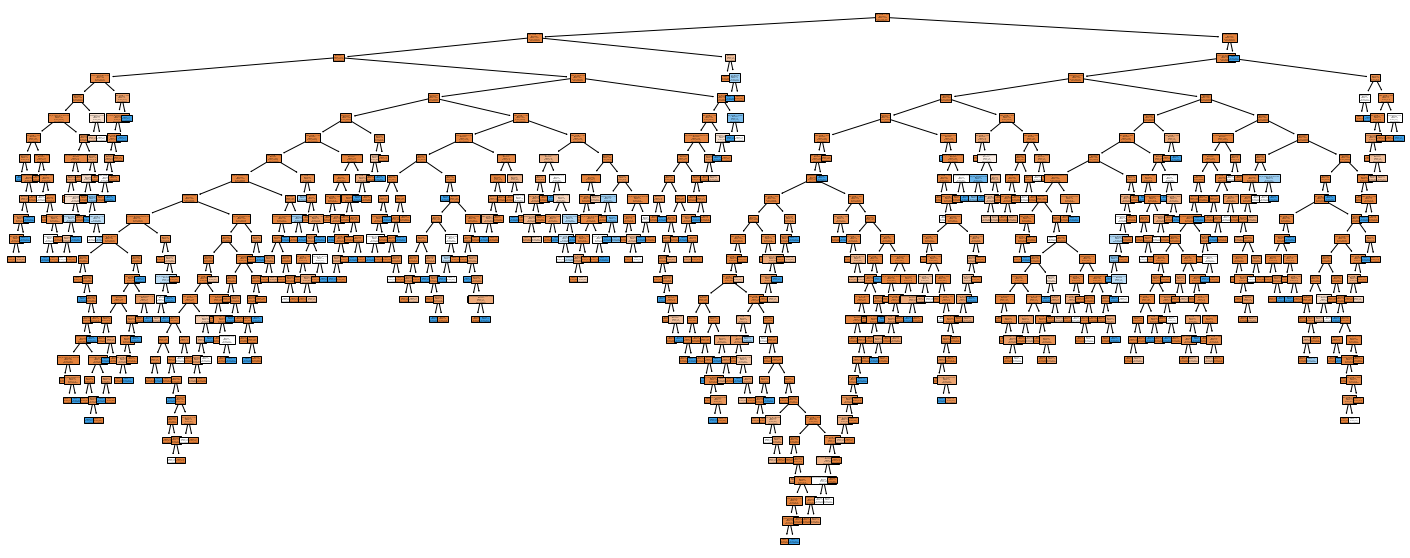

In [62]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

In [56]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=70)

In [57]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0])

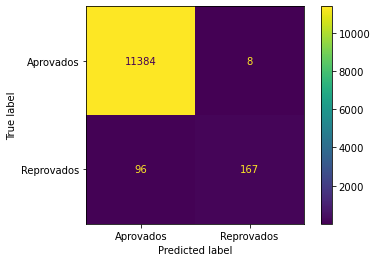

In [58]:
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);

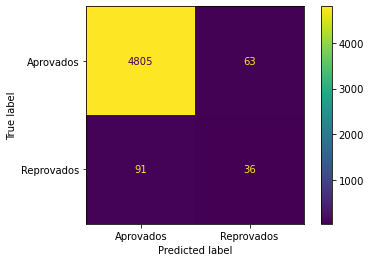

In [59]:
plot_confusion_matrix(clf, X_test,y_test, display_labels=['Aprovados', 'Reprovados']);

In [64]:
X_test.shape

(4995, 28)

In [63]:
(4805+36)/(4805+36+91+63)

0.9691691691691692

In [67]:
accuracy_score(y_test, y_chapeu_teste)

0.9691691691691692

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [18]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10 ,random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9727727727727727

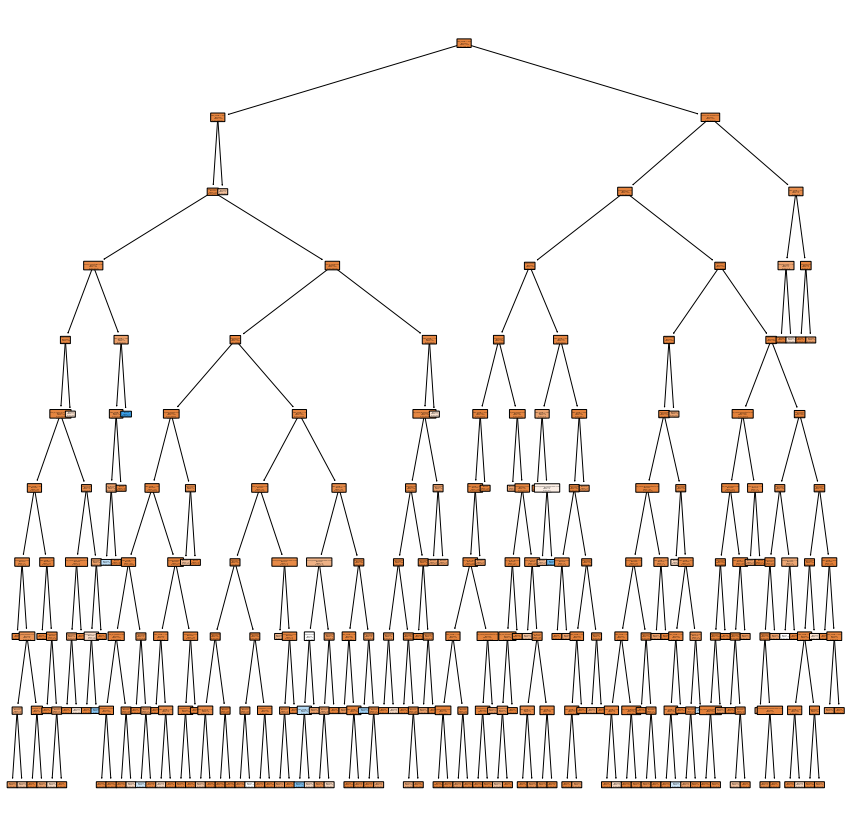

In [19]:
plt.figure(figsize=[15,15])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_train.columns);

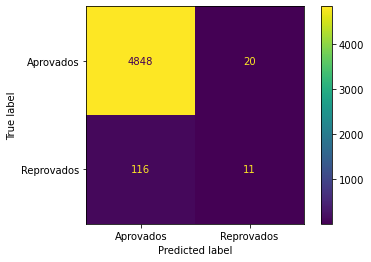

In [20]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [21]:
accuracy_score(y_test, predict)

0.9727727727727727